<h1> Keras House price prediction using Regression model</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#dataset used is taken from kaggle https://www.kaggle.com/harlfoxem/housesalesprediction
df=pd.read_csv('../data/kc_house_data.csv')

<h3> Exploratory Data Analysis </h3>

In [3]:
#data.isnull().sum()
df.describe().transpose().astype(str)

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4580474287.770987,2876735715.74778,1000102.0,2123049175.0,3904930410.0,7308900490.0,9900000190.0
price,21597.0,540296.5735055795,367368.1401013936,78000.0,322000.0,450000.0,645000.0,7700000.0
bedrooms,21597.0,3.3731999814789093,0.926298894542015,1.0,3.0,3.0,4.0,33.0
bathrooms,21597.0,2.1158262721674306,0.7689842966527002,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,2080.3218502569803,918.1061250800823,370.0,1430.0,1910.0,2550.0,13540.0
sqft_lot,21597.0,15099.408760475992,41412.63687550209,520.0,5040.0,7618.0,10685.0,1651359.0
floors,21597.0,1.4940964022780943,0.5396827909775687,1.0,1.0,1.5,2.0,3.5
waterfront,21597.0,0.007547344538593323,0.08654899751119013,0.0,0.0,0.0,0.0,1.0
view,21597.0,0.23429179978700745,0.7663898324643059,0.0,0.0,0.0,0.0,4.0
condition,21597.0,3.4098254387183404,0.6505456356724978,1.0,3.0,3.0,4.0,5.0


<AxesSubplot:xlabel='price', ylabel='Density'>

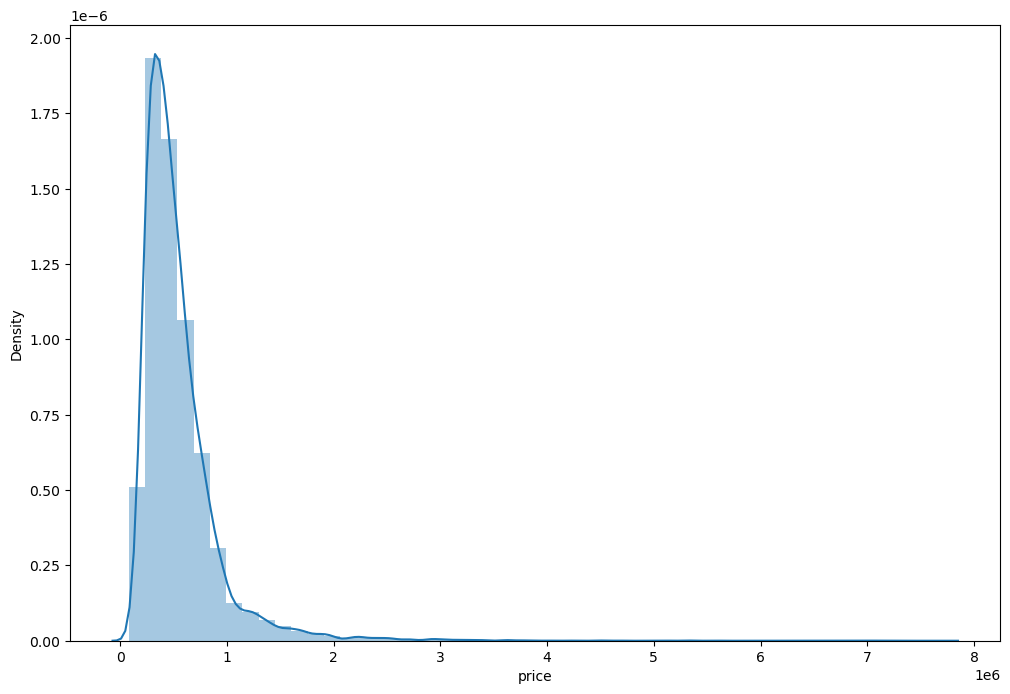

In [4]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

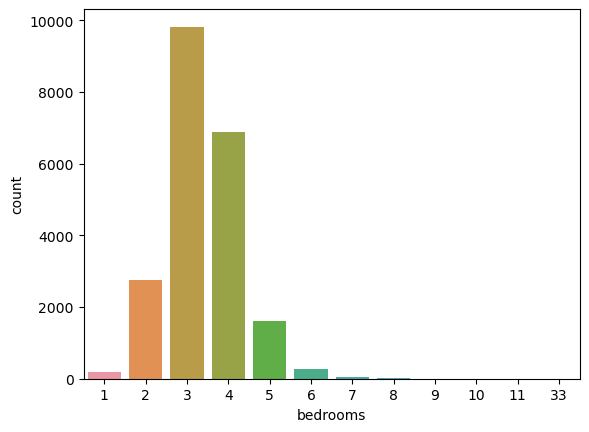

In [5]:
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

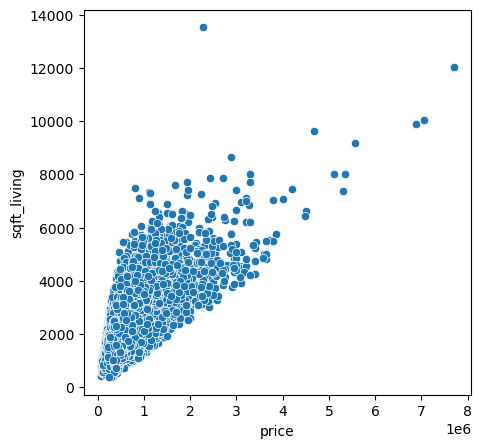

In [6]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

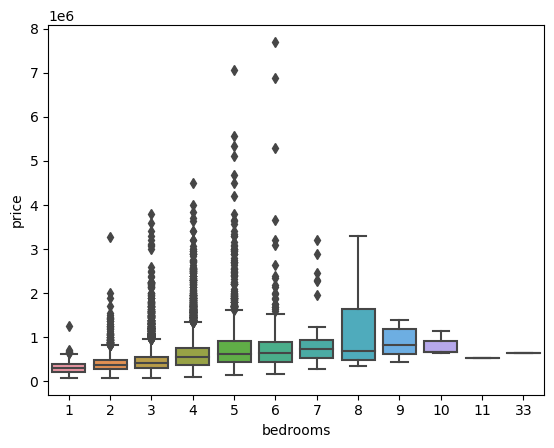

In [7]:
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

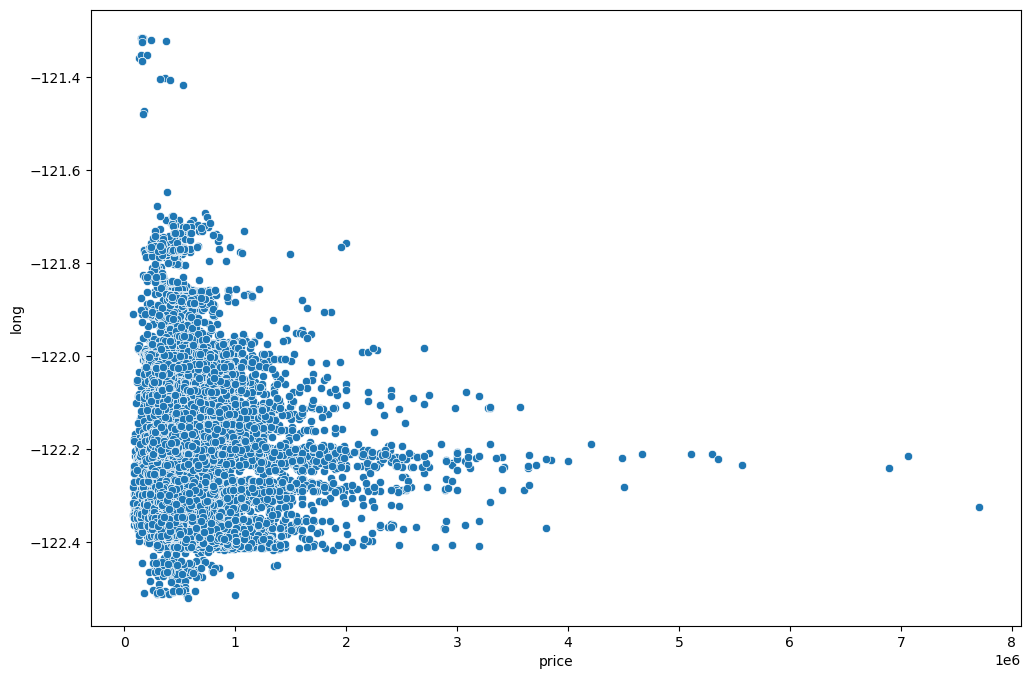

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

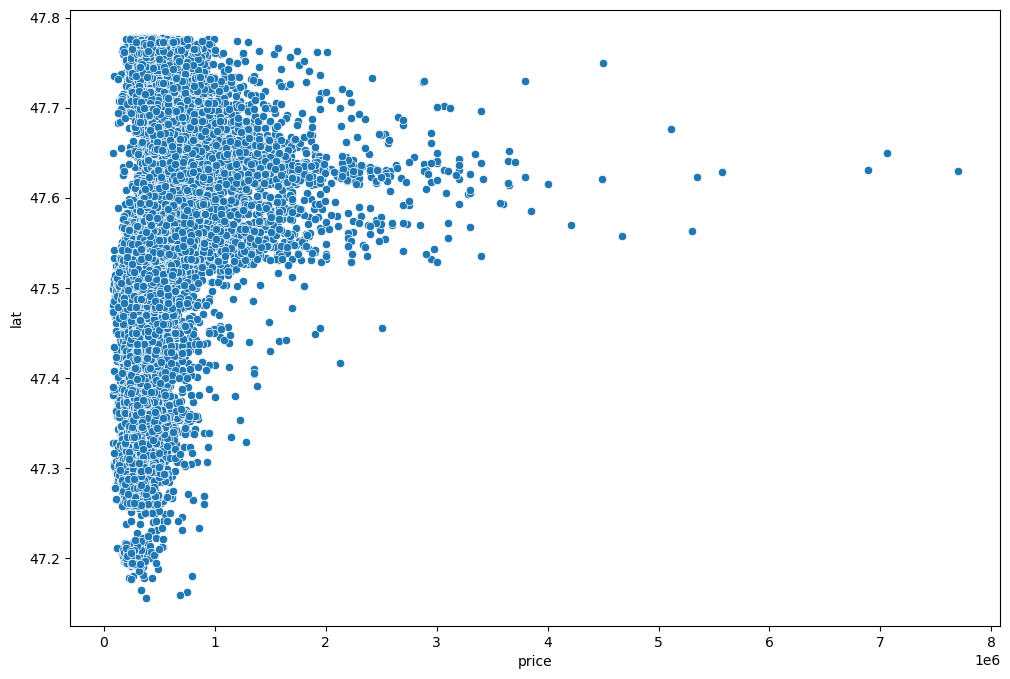

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

In [10]:
df.sort_values('price',ascending=False)[:50]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


<h3> Feature Engineering from Date </h3>

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

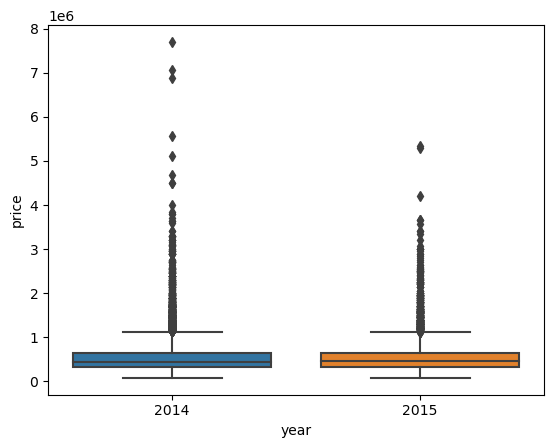

In [12]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

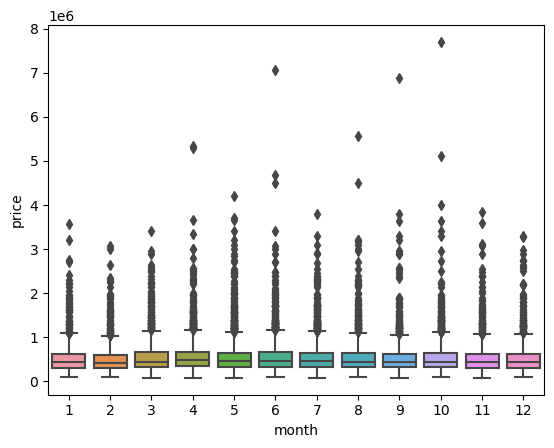

In [13]:
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

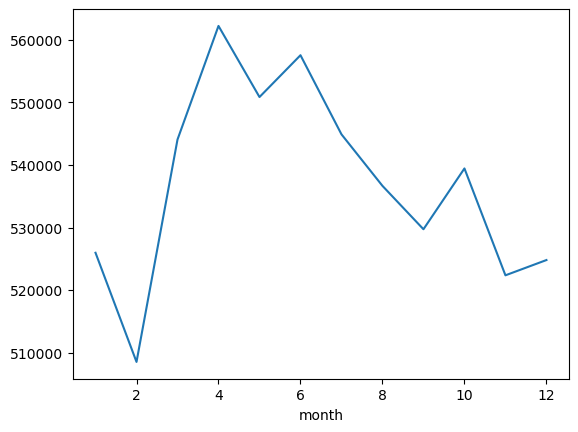

In [14]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

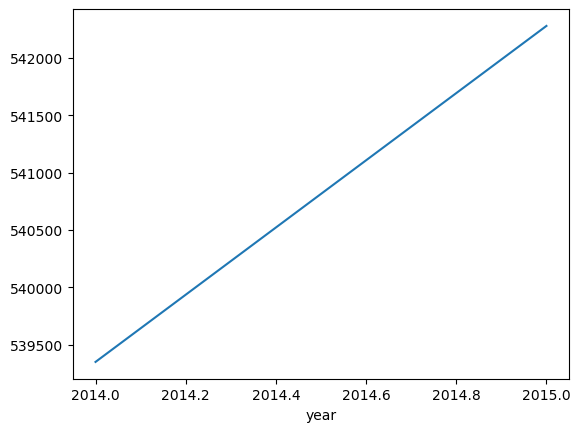

In [15]:
df.groupby('year').mean()['price'].plot()

In [16]:
df = df.drop('date',axis=1)
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [17]:
df = df.drop('zipcode',axis=1)

In [18]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

<h3> Scaling and Train Test Split </h3>

In [19]:
X = df.drop('price',axis=1)
y = df['price']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [21]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

<h3> Creating a Model </h3>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [24]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

<h3> Training Model </h3>

In [26]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 4s 9ms/step - loss: 430238629888.0000 - val_loss: 418910830592.0000
Epoch 2/400
119/119 [==============================] - 1s 5ms/step - loss: 429248610304.0000 - val_loss: 415567609856.0000
Epoch 3/400
119/119 [==============================] - 1s 5ms/step - loss: 415871795200.0000 - val_loss: 384970293248.0000
Epoch 4/400
119/119 [==============================] - 1s 5ms/step - loss: 349253697536.0000 - val_loss: 275587825664.0000
Epoch 5/400
119/119 [==============================] - 1s 5ms/step - loss: 206911832064.0000 - val_loss: 131581665280.0000
Epoch 6/400
119/119 [==============================] - 1s 5ms/step - loss: 112430399488.0000 - val_loss: 98704490496.0000
Epoch 7/400
119/119 [==============================] - 1s 5ms/step - loss: 101277859840.0000 - val_loss: 96789291008.0000
Epoch 8/400
119/119 [==============================] - 1s 5ms/step - loss: 99246505984.0000 - val_loss: 94868291584.0000
Epoch 9/400
119/119 

<AxesSubplot:>

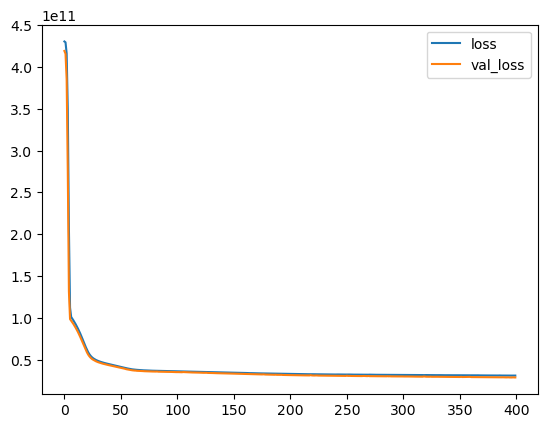

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()

<h3> Evaluation on Test Data </h3>

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [30]:
predictions = model.predict(X_test)

203/203 [==============================] - 3s 2ms/step


In [31]:
mean_absolute_error(y_test,predictions)

105495.36138840663

In [32]:
explained_variance_score(y_test,predictions)

0.7812478548928851

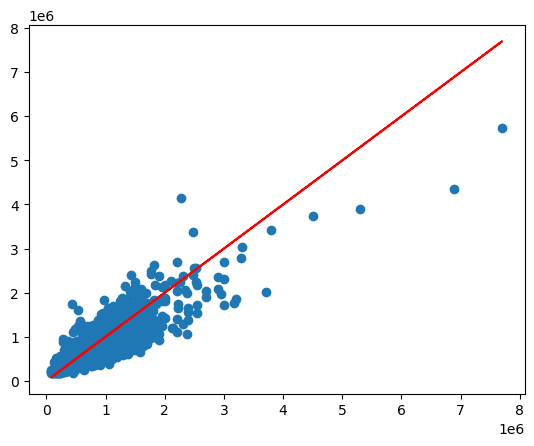

In [33]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [34]:
errors = y_test.values.reshape(6480, 1) - predictions

<AxesSubplot:ylabel='Density'>

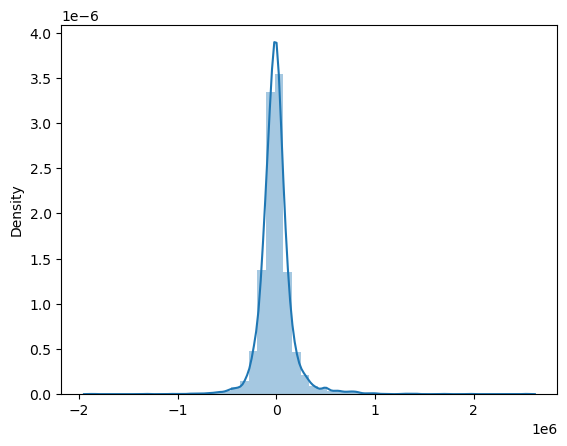

In [35]:
sns.distplot(errors)

<h3> Predicting on a brand new house </h3>

In [37]:
single_house = df.drop('price',axis=1).iloc[0]

In [41]:
single_house = scaler.transform(single_house.values.reshape(1, 20))

In [42]:
model.predict(single_house)

1/1 [==============================] - 0s 51ms/step


array([[284526.16]], dtype=float32)